## 3.5 Classifying Newswires

(1) 케라스 창시자에게 배우는 딥러닝 도서의 실습 코드 입니다. <br><br>
(2) 코드를 이해한 후, 각 입력창 마다 주석을 추가해 보았습니다. <br><br>
(3) 필요 시 입력 창을 Add 하여 내용을 추가하였습니다.  <br><br>
(4) 번역자의 원 코드가 있는 Github URL은 아래와 같습니다. <br><br>
https://github.com/rickiepark/deep-learning-with-python-notebooks

In [1]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)         # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

In [2]:
# keras 버전 확인
import keras
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

'2.3.1'

### 다중 분류 (Reuter Dataset)
Reuter Dataset은 46개의 배타적인 Topic으로 이루어진 Reuter News Dataset 입니다.
- Train Data : 8982개, Test Data2246개
- 데이터는 다음과 같이 전 처리 되어 있음
<br>
(1) 각 리뷰의 단어가 이에 대응하는 정수로 변환되어 있음 <br>
(2) Train/Test Label은 0 ~ 45 까지 정수(총 46가지 Topic) 으로 구분되어 있음 <br>

In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#  train data/label, test data/label을  구분 관리하고, 자주 사용하는 단어 10000개로 한정

In [4]:
len(train_data)
len(train_labels)
len(test_data)
len(test_labels)

train_data.shape
train_labels.shape
test_data.shape
test_labels.shape

# 8982 건의 training Data / Label, 2246 건의 test Data / Label

8982

8982

2246

2246

(8982,)

(8982,)

(2246,)

(2246,)

In [5]:
train_labels[0]
# 해당되는 Topic을 0 ~ 45 사이의  정수값으로 display

train_data[10] 
# 기사 리뷰의 내용을 0 ~ 9999 사이의 정수로 변환하여 display

3

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
# word_index는 개별 단어와 이 단어에 해당하는 숫자를 맵핑해 놓은 Dictionary 임

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# word_index는 ''단어:숫자" 의 Dictionary 이나, 이를 "숫자:단어" 순으로 순서를 뒤집음

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
# for 문을 돌면서 train_data[10]를 구성하는 각 숫자를 이에 맵핑하는 단어로 치환하여 문자열을 구성 함
# 이때 0, 1, 2는 사전 정의된 값(index) 이므로, 해당 갯수(3) 만큼 빼고 치환을 진행
# 가장 자주 등장하는 단어 10,000개 로 제한하였으므로, 이에 해당되지 않는 key(숫자)는 '?' 로 display 됨

In [7]:
decoded_newswire
# reverse_word_index method를 이용하여 train_data[10]를 구성하는 각 숫자를 이에 맵핑하는 단어로 치환

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [8]:
train_labels[10]
# 10번 기사에 해당되는 Topic은 3 임

3

In [9]:
import numpy as np

# 전처리 하여 숫자만으로 구성된 리스트를 신경망에 바로 주입 할 수 없으므로, 
# (1)이를 Matrix(2차원 텐서)로 변환
# (2) 각 row(숫자로 구성되어 있는 전처리된 리뷰)의 개별 숫자값을 column 값으로 하여, 해당  (row, column)의 0 값 -> 1 로 변경
def zero_matrix(rows, dimension=10000):
    results = np.zeros((len(rows), dimension))    # Matrix(2차원 텐서)로 변환
    
    for i, col in enumerate(rows):
            results[i, col] = 1.                                       #각  row(숫자로 구성되어 있는 전처리된 리뷰)의 개별 숫자값을 column 값으로 하여, 해당  (row, column)의 0 값 -> 1 로 변경    

    return results

# train_data를 matrix로 변환
x_train = zero_matrix(train_data)

#  test_data를 matrix로 변환
x_test = zero_matrix(test_data)

In [10]:
#  NN에 주입하기 위해,
# train 행렬 : 8982 * 10000
# test   행렬 : 2246 * 10000  으로 정규화

x_train
x_test

x_train.shape
x_test.shape

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

(8982, 10000)

(2246, 10000)

In [11]:
# label 값을 one-hot encoding 행렬로 변경하는 function
# 금번 예제에서는 해당 function을 사용하지 않고, 바로 아래의 to_categorical function을 사용 함

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
# NN에 주입하기 위해 train_label과  test_label을 one-hot encoding 행렬로 변경하는 function 사용 (to_categorical)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### NN(Neural Network) 모델 생성

In [13]:
# 기존의 IMDB Binary Classification (긍정/부정)과 기본적으로 동일한 방식이나, Multi Classification 이므로, 출력 parameter가 46개로 늘어남
# 출력의 dimension이 커졌으므로, 중간 층의 parameter의 갯수를 충분히 늘려주지 않으면, 정보의 유실(누락)이 발생 될 수 있음
# 그러므로 중간 paramter의 갯수를 128개로 구성

from keras import models
from keras import layers

# 앞서와 마찬가지로 선형적으로 쌓는 Sequential 모델을 이용
model = models.Sequential()

# 입력층 : 입력 parameter는 10000이고, 출력 parameter는 128 임, 활성화 함수는 relu
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))

# 은닉층 : 입력 parameter는 128이고, 출력 parameter는 128 임, 활성화 함수는 relu
model.add(layers.Dense(128, activation='relu'))

# 출력층 : 입력 parameter는 128이고, 출력 parameter는 46 임, 활성화 함수는 softmax
# 주로 Binary Classification의 경우는 'Sigmoid', Multi-Classification의 경우는 'Softmax' 활성화 함수 이용 -> 각각의 review가 46개 중 어떤 topic인지 확률을 계산
model.add(layers.Dense(46, activation='softmax'))

In [14]:
# compile method를 이용하여 학습 과정을 구성
# 옵티마이저는 rmsprop 사용하고, Multi-Classification 이므로 손실함수는 'categorical_crossentropy'를 사용

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Training 검증

In [15]:
# 전체 10000 set의 Data에서 검증 Data로 1000 set 을 추출
#  x_train               :  1000 set
#   partial_x_train : 7982 set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# x_val, partial_x_train 의 shape 확인
x_val.shape
partial_x_train.shape
y_val.shape
partial_y_train.shape


(1000, 10000)

(7982, 10000)

(1000, 46)

(7982, 46)

In [16]:
# fit method를 이용해서 정해진 epoch 만큼  Training을 수행
# 이때 Training Data(partial_x_train)과 Validation Data(x_val)을 주입하고, epoch, batch size 지정

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/step - loss: 2.1238 - accuracy: 0.5584 - val_loss: 1.4226 - val_accuracy: 0.6770
Epoch 2/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0884 - accuracy: 0.7610 - val_loss: 1.1328 - val_accuracy: 0.7660
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.7686 - accuracy: 0.8341 - val_loss: 0.9935 - val_accuracy: 0.7790
Epoch 4/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.5572 - accuracy: 0.8821 - val_loss: 0.9905 - val_accuracy: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.4054 - accuracy: 0.9132 - val_loss: 0.9299 - val_accuracy: 0.7860
Epoch 6/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.3094 - accuracy: 0.9325 - val_loss: 0.8833 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 119us/step - los

In [17]:
model.summary()

#  dense_1 layer의 전체 paramenter의 수는 10000(입력) * 128(출력) + 128 = 1,280,128 임 (추가적으로 더하는 128은 bias)
#  dense_2 layer의 전체 paramenter의 수는 128 * 128 + 128 = 16,512 임 (추가적으로 더하는 128은 bias)
#  dense_3 layer의 전체 paramenter의 수는 128 * 46 + 46 = 5,934 임 (추가적으로 더하는 46은 bias)
# 그러므로 총 paramter의 수는 1,280,128 + 16,512 + 5,934 = 1,302,574

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


### Graph Visualization

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

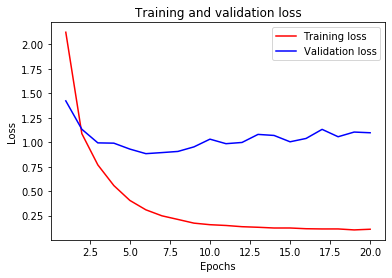

In [29]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

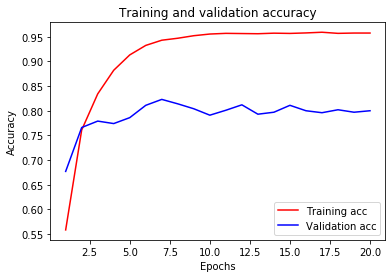

In [19]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# 위의 그래프에서 epoch = 8를 초과하면 과적합이 발생함을 알 수 있으므로, epoch=8로 Network을 다시 구성
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fit method로 Training 시, epoch = 8로 Setting 하여 과적합 방지
model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

# evaluate method를 이용하여  test data에 대한 loss, accuracy를 계산
loss, accuracy = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 155us/step - loss: 2.2399 - accuracy: 0.5554 - val_loss: 1.4389 - val_accuracy: 0.6500
Epoch 2/8
7982/7982 [==============================] - 1s 136us/step - loss: 1.1193 - accuracy: 0.7547 - val_loss: 1.0857 - val_accuracy: 0.7570
Epoch 3/8
7982/7982 [==============================] - 1s 133us/step - loss: 0.7728 - accuracy: 0.8371 - val_loss: 0.9988 - val_accuracy: 0.7870
Epoch 4/8
7982/7982 [==============================] - 1s 122us/step - loss: 0.5666 - accuracy: 0.8824 - val_loss: 0.9164 - val_accuracy: 0.8090
Epoch 5/8
7982/7982 [==============================] - 1s 124us/step - loss: 0.4254 - accuracy: 0.9113 - val_loss: 0.8595 - val_accuracy: 0.8130
Epoch 6/8
7982/7982 [==============================] - 1s 124us/step - loss: 0.3153 - accuracy: 0.9346 - val_loss: 0.8885 - val_accuracy: 0.8090
Epoch 7/8
7982/7982 [==============================] - 1s 118us/step - loss: 0.256

2246/2246 [==============================] - 0s 62us/step


In [28]:
# 약 79%의 정확도로 Reuter Review Topic을 분류 함을 할 수 있음

print('test_acc : ', accuracy)
print('test_loss : ', loss)

test_acc :  0.7934104800224304
test_loss :  0.9902362655765333


In [22]:
# 균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50%의 정확도를 달성합니다. 
# 해당 문제는 불균형한 데이터셋을 사용하므로 무작위로 분류하면 19% 정도를 달성합니다.

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18744434550311664

In [23]:
# softmax function을 사용했으므로, 아래의 0번째 test data 예측 결과(확률)의 sum은 1 이 됨
# 해당 0번째 Reuter Review는 4번째 Topic일 가능성이 가장 높음

predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])
print(predictions[0])

(46,)

0.9999998

3

[1.5151149e-04 3.1164759e-03 1.4903626e-04 7.1528304e-01 2.3366521e-01
 2.9578744e-04 4.4080062e-04 7.7400000e-05 5.8550253e-03 5.5775908e-04
 1.7444938e-04 6.5247086e-03 5.1165983e-04 6.8140490e-04 2.6166433e-04
 3.3618670e-04 2.8238466e-03 3.1241949e-03 8.9606747e-04 3.5444722e-03
 6.4621018e-03 2.1347022e-03 2.3084012e-05 1.8938388e-03 3.5755965e-04
 5.8360712e-04 3.9477498e-05 6.4476379e-05 2.6670384e-04 9.9176227e-04
 8.1375847e-04 1.9546236e-04 5.6852127e-04 8.0541620e-05 1.2800881e-03
 7.9689031e-05 2.3303770e-03 4.5176046e-05 1.4079096e-04 2.4325131e-03
 1.1584949e-04 4.3263953e-04 4.2786021e-05 7.4736017e-05 2.5511692e-05
 5.3429761e-05]


In [24]:
# 해당 Multi-Classification과 같이 출력 paramter가 다중 값의 경우(Reuter Review는 46개 Topic), 
# 중간 은닉층(Hidden Layer)의 parameter는 해당 갯수보다 많아야 함

# 아래와 같이 중간 은닉층의 parameter(4) 갯수가 출력 parameter(46) 갯수보다 적은 경우, 정보의 병목으로 정확도가 감소 함
# 해당 예제의 경우 79% -> 71%로 감소

# 원문
# 검증 정확도의 최고 값은 약 71%로 8% 정도 감소되었습니다. 이런 손실의 대부분 원인은 많은 정보(46개 클래스의 분할 초평면을 
# 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 
# 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 114us/step - loss: 2.6591 - accuracy: 0.4976 - val_loss: 1.9767 - val_accuracy: 0.5890
Epoch 2/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.6513 - accuracy: 0.6218 - val_loss: 1.5101 - val_accuracy: 0.6400
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.2954 - accuracy: 0.6854 - val_loss: 1.3601 - val_accuracy: 0.6960
Epoch 4/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.1090 - accuracy: 0.7350 - val_loss: 1.3087 - val_accuracy: 0.7100
Epoch 5/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.9866 - accuracy: 0.7524 - val_loss: 1.2774 - val_accuracy: 0.7130
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.8952 - accuracy: 0.7736 - val_loss: 1.2769 - val_accuracy: 0.7160
Epoch 7/20
7982/7982 [==============================] - 1s 100us/step - loss: 